<a href="https://colab.research.google.com/github/HeatlerX/229351-LAB07/blob/main/670510758_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [24]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-09 07:47:41--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-09 07:47:41 (51.6 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [25]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [26]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


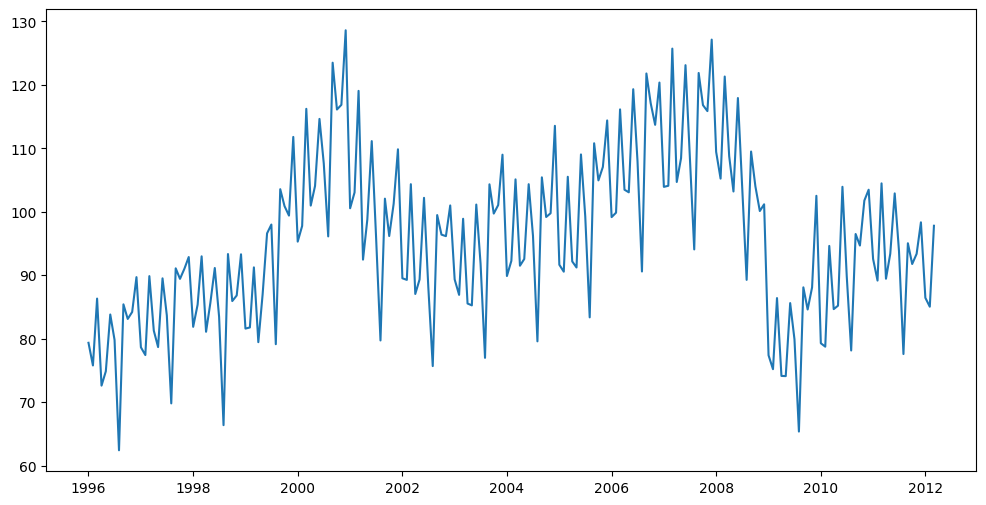

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [28]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [29]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [30]:
# Add or change values

data.loc['2012-01-01','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.45


# Moving average

In [31]:

data['MA'] = data['value'].rolling(window=5,center=True).mean() #5MA เลขคี่
#12MA เลขคู่
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.tail(12)

,Unnamed: 0,value,MA
time,,,
2011-04-01,184,89.45,94.735417
2011-05-01,185,93.40,94.264167
2011-06-01,186,102.90,93.700000
2011-07-01,187,93.77,93.230833
2011-08-01,188,77.58,92.804167
2011-09-01,189,95.04,92.354167
2011-10-01,190,91.77,NaN
2011-11-01,191,93.37,NaN
2011-12-01,192,98.34,NaN


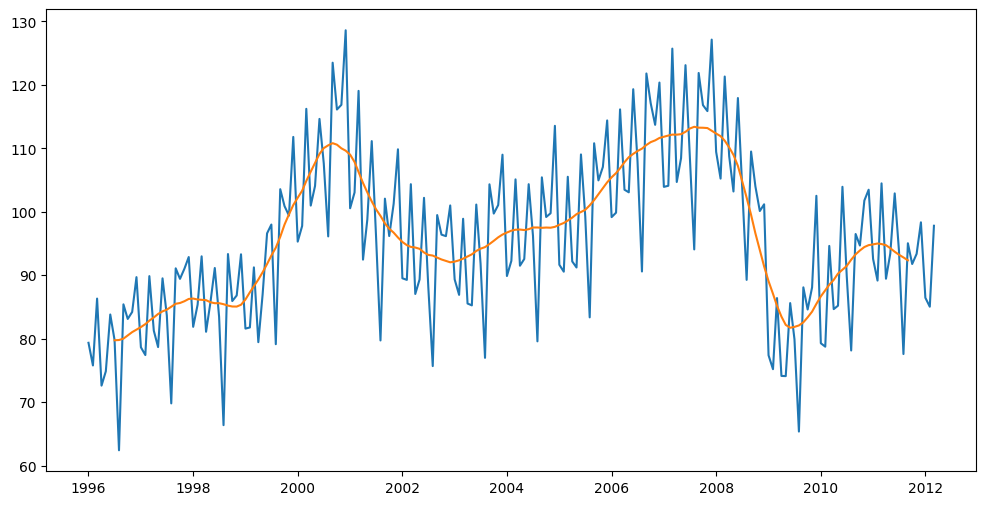

In [32]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

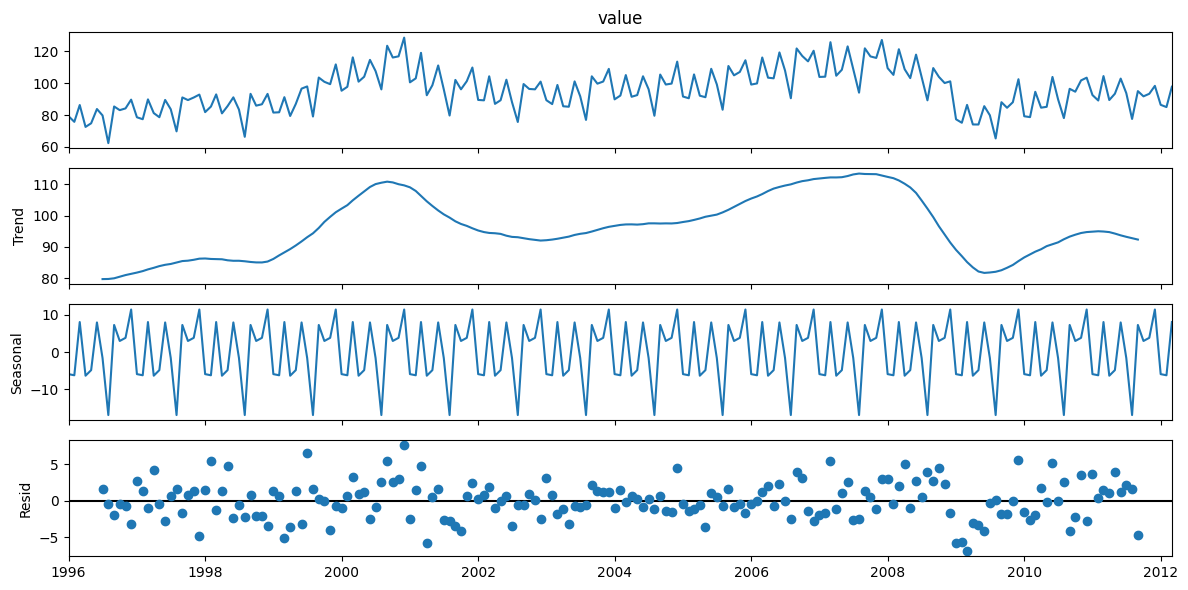

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',period=12)

result_add.plot();

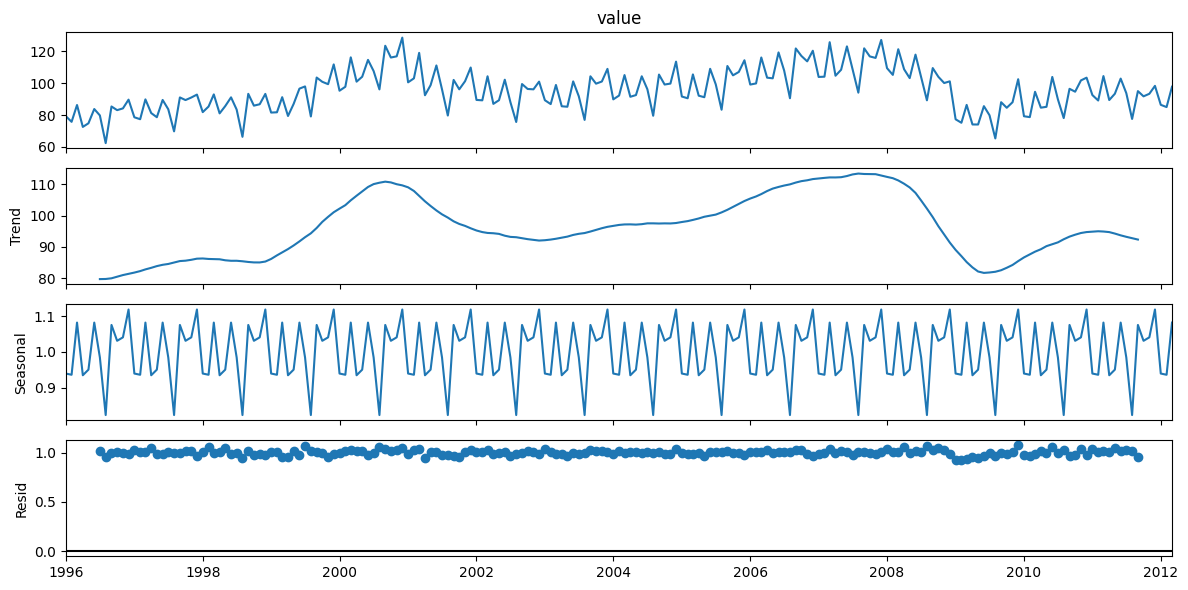

In [34]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [35]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887651
1996-02-01    -6.199262
1996-03-01     8.083182
1996-04-01    -6.314957
1996-05-01    -4.818457
                ...    
2011-11-01     3.847376
2011-12-01    11.447515
2012-01-01    -5.887651
2012-02-01    -6.199262
2012-03-01     8.083182
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.45
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [36]:
train=data['1996-01-01':'2009-12-01']['value']

In [37]:
test=data['2010-01-01':'2012-03-01']['value']

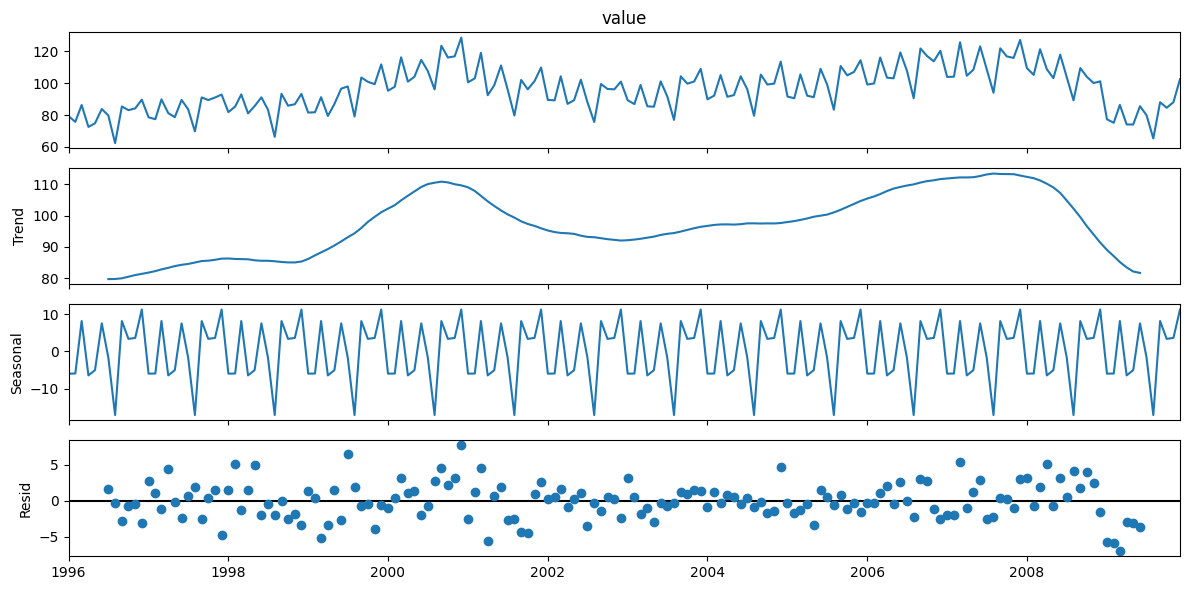

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(train, model='additive',period=12)
result_add.plot();

In [39]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: trend, Length: 168, dtype: float64
time
1996-01-01    -5.985857
1996-02-01    -5.957941
1996-03-01     8.183245
1996-04-01    -6.462428
1996-05-01    -5.041178
                ...    
2009-08-01   -17.138902
2009-09-01     8.178886
2009-10-01     3.378341
2009-11-01     3.644335
2009-12-01    11.289463
Name: seasonal, Length: 168, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: resid, Length: 168, dtype: float64
time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-1

In [40]:
last_trend = (result_add.trend.dropna() + result_add.resid.dropna()).iloc[-1]
seasonal_test = result_add.seasonal[:len(test)].values
ts_new = pd.Series(seasonal_test + last_trend, index=test.index)

In [41]:
seasonal_test

array([ -5.98585737,  -5.95794071,   8.18324519,  -6.46242788,
        -5.04117788,   7.55298878,  -1.64095353, -17.13890224,
         8.17888622,   3.37834135,   3.64433494,  11.28946314,
        -5.98585737,  -5.95794071,   8.18324519,  -6.46242788,
        -5.04117788,   7.55298878,  -1.64095353, -17.13890224,
         8.17888622,   3.37834135,   3.64433494,  11.28946314,
        -5.98585737,  -5.95794071,   8.18324519])

In [42]:
ts_new

,0
time,
2010-01-01,72.071154
2010-02-01,72.099071
2010-03-01,86.240256
2010-04-01,71.594583
2010-05-01,73.015833
2010-06-01,85.610000
2010-07-01,76.416058
2010-08-01,60.918109
2010-09-01,86.235897


In [43]:
y_true=data['2010-01-01':'2012-03-01']['value']
y_pred=ts_new

In [44]:
def rmse(y_true,y_pred):
  # Inputs
  y_true=data['2010-01-01':'2012-03-01']['value']
  y_pred=ts_new
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [45]:
rmse(y_true,y_pred)

np.float64(14.590131827031344)

<Axes: xlabel='time'>

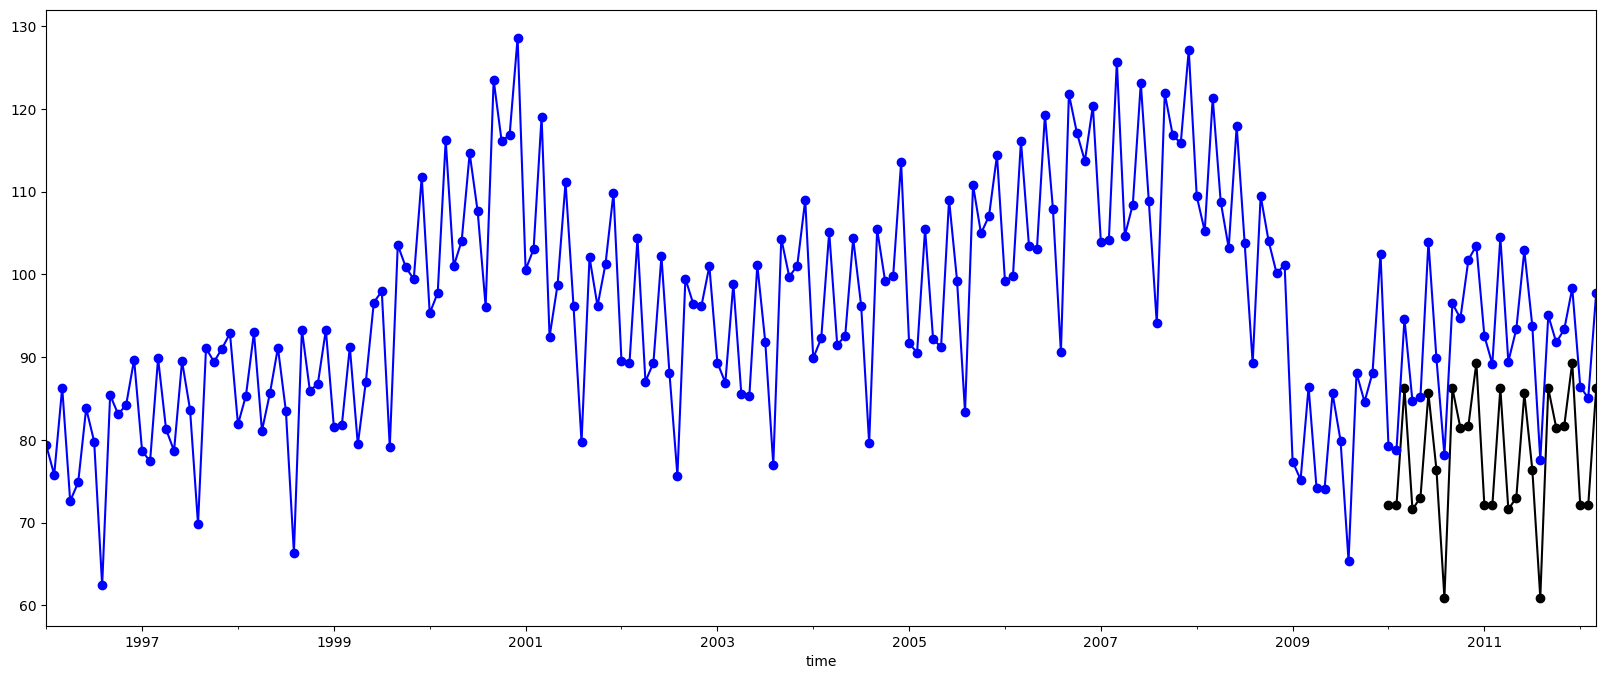

In [46]:
ax = ts_new.plot(marker='o', color='black', figsize=(20,8))
data['value'].plot(marker='o', color='blue', figsize=(20,8))